# Chronic Kidney Disease Predictor
## Description:
Chronic Kidney Disease (CKD) is a major health problem around the world. According to studies, the rate of CKD has increased by up to 17%—affecting 1 out of 10 people. If CKD is detected at an early stage, it can be diagnosed and controlled by medications—preventing other organ failures and even death.The objective of this project is to create a tool that will help for early detection of CKD by implementing 3 machine learning models—Kmeans, decision, linear

## About the Dataset 
### Data Source: 
This dataset was created by gathering over 2-months worth of data from the hospitals of India. After being combined, it resulted in a total of 400 rows and 25 columns. The dataset can be accessed on the following link: https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease

### Data Features:
1. **Age:** *[years]*
    - patient's age
2. **Blood Pressure:** *[mm Hg]*
    - patient's blood pressure
3. **Specific Gravity:** *[SG]*
    - ratio of the density of urine to the density of water
4. **Albumin:** *[g/dL]*
    - amount of albumin in the patient's blood
5. **Sugar Level:** *[mmol/L]*
    - concentration of sugar in the patient's blood
6. **Red Blood Cells:** *[Normal, Abnormal]*
    - count of red blood cells in the patient's blood
7. **Pus Cells:** *[Normal, Abnormal]*
    - count of pus cells in the patient's urine
8. **Pus Cell Clumps:** *[Present, Not present]*
    - presence of clumps of pus cells in the patient's urine
9. **Bacteria Presence:** *[Present, Not present]*
    - presence of bacteria in the patient's urine
10. **Blood Glucose Level (Random):** *[mg/dL]*
    - random blood glucose level in the patient's blood
11. **Blood Urea Level:** *[mg/dL]*
    - concentration of urea in the patient's blood
12. **Serum Creatinine Level:** *[mg/dL]*
    - concentration of creatinine in the patient's serum
13. **Sodium Level:** *[mmol/L]*
    - concentration of sodium in the patient's blood
14. **Potassium Level:** *[mEq/L]*
    - concentration of potassium in the patient's blood
15. **Hemoglobin Level:** *[g/dL]*
    - concentration of hemoglobin in the patient's blood
16. **Packed Cell Volume (PCV):** *[Numeric value in percentage]*
    - volume percentage of red blood cells in the patient's blood.
17. **White Blood Cell Count (WBC):** *[cmm]*
    - number of white blood cells per unit volume in the patient's blood
18. **Red Blood Cell Count (RBC):** *[million/mm3]*
    - number of red blood cells per unit volume in the patient's blood
19. **Hypertension (HTN):** *[Yes, No]*
    - presence of hypertension in the patient
20. **Diabetes Mellitus (DM):** *[Yes, No]*
    - presence of diabetes mellitus in the patient
21. **Coronary Artery Disease (CAD):** *[Yes, No]*
    - presence of coronary artery disease in the patient
22. **Appetite:** *[Good, Poor]*
    - description of the patient's appetite
23. **Pedal Edema (PE):** *[Yes, No]*
    - presence of pedal edema in the patient
24. **Anemia (ANE):** *[Yes, No]*
    - presence of anemia in the patient
25. **Classification:** *[CKD: Chronic Kidney Disease, NotCKD: Normal]*
    - overall classification of the patient's health status



## Step 1: Importing Libraries


In [237]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#Import algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Graph design preference
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

## Step 2: Describing the Data 
 - Shows dataset information and summary

In [238]:
df = pd.read_csv('CKD.csv') #Loading dataset

df.head() #This is to show the first 5 records in the dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


- The table header titles do not clearly convey what variable they are, we will address this issue later.

In [239]:
df.tail() #This is to show the last 5 records in the dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,1.1,141.0,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


In [240]:
df.sample(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
147,147,60.0,60.0,1.010,3.0,1.0,normal,abnormal,present,notpresent,288.0,36.0,1.7,130.0,3.0,7.9,25,15200,3,yes,no,no,poor,no,yes,ckd
309,309,51.0,60.0,1.020,0.0,0.0,NaN,NaN,notpresent,notpresent,129.0,25.0,1.2,139.0,5.0,17.2,40,8100,5.9,no,no,no,good,no,no,notckd
114,114,12.0,60.0,1.015,3.0,0.0,abnormal,abnormal,present,notpresent,NaN,51.0,1.8,NaN,NaN,12.1,NaN,10300,NaN,no,no,no,good,no,no,ckd
393,393,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,117.0,45.0,0.7,141.0,4.4,13.0,54,7400,5.4,no,no,no,good,no,no,notckd
42,42,47.0,100.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,204.0,29.0,1.0,139.0,4.2,9.7,33,9200,4.5,yes,no,no,good,no,yes,ckd
111,111,65.0,80.0,1.010,3.0,3.0,NaN,normal,notpresent,notpresent,294.0,71.0,4.4,128.0,5.4,10.0,32,9000,3.9,yes,yes,yes,good,no,no,ckd
354,354,32.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,102.0,17.0,0.4,147.0,4.7,14.6,41,6800,5.1,no,no,no,good,no,no,notckd
250,250,40.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,140.0,10.0,1.2,135.0,5.0,15.0,48,10400,4.5,no,no,no,good,no,no,notckd
199,199,65.0,80.0,1.015,0.0,0.0,NaN,normal,notpresent,notpresent,92.0,37.0,1.5,140.0,5.2,8.8,25,10700,3.2,yes,no,yes,good,yes,no,ckd
97,97,65.0,60.0,1.015,1.0,0.0,NaN,normal,notpresent,notpresent,91.0,51.0,2.2,132.0,3.8,10.0,32,9100,4,yes,yes,no,poor,yes,no,ckd


In [241]:
df.shape #To show (No. of Records, Columns/Fields)


(400, 26)

In [242]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [243]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

- Looking at the numbers, we can see that there are lots of empty values in the dataset. We will address this issue on the next step.

In [244]:
df.duplicated().sum()

0

## Step 3: Data Preprocessing 
- Covers the data preprocessing steps taken such as data cleaning, feature selection, and handling missing
values to prepare the data for analysis.

In [245]:

df.drop('id', axis = 1 , inplace = True) 

- Dropping id column as it is irrelevant to the project.

In [246]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anemia', 'class']

df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


- Renaming table headers to improve its readability and make it more user-friendly.

In [247]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

   - As we can see, 'packed_cell_volume', 'white_blood_cell_count', and 'red_blood_cell_count' are object type. We have to change these necessary columns to numerical type.

In [249]:
#Changing from object to numeric data types, if errors are encountered, the value will be NaN
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [251]:
#Extracting categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [252]:
#Looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

pedal_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



- There are unclear values present in the columns. This will affect the result so we'll have to do something about it.

In [253]:
#Replace the unclear values
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [254]:
#Change the value of 'class' from objective to numeric
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})

In [255]:
#Check if the changes are successful
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [256]:
#Break down categories for better accessibility
cat_df = df.select_dtypes(include=object)
num_df = df.select_dtypes(exclude=object)

In [257]:
#Checking for null/NaN values
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

- There are lots of null values on the data set, dropping rows is not an option as it will greatly decrease the quantity.
- First, we have to access the numerical and object type data.

In [258]:

df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
hemoglobin                 52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [259]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [260]:
#Random sampling for few missing values.
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

#Mean/mode sampling for many missing values   
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [261]:
for col in num_cols:
    random_value_imputation(col)

df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [262]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

- Now that all null values are handled, we can now proceed to visualize and analyze data

## Step 4: Exploratory Data Analysis

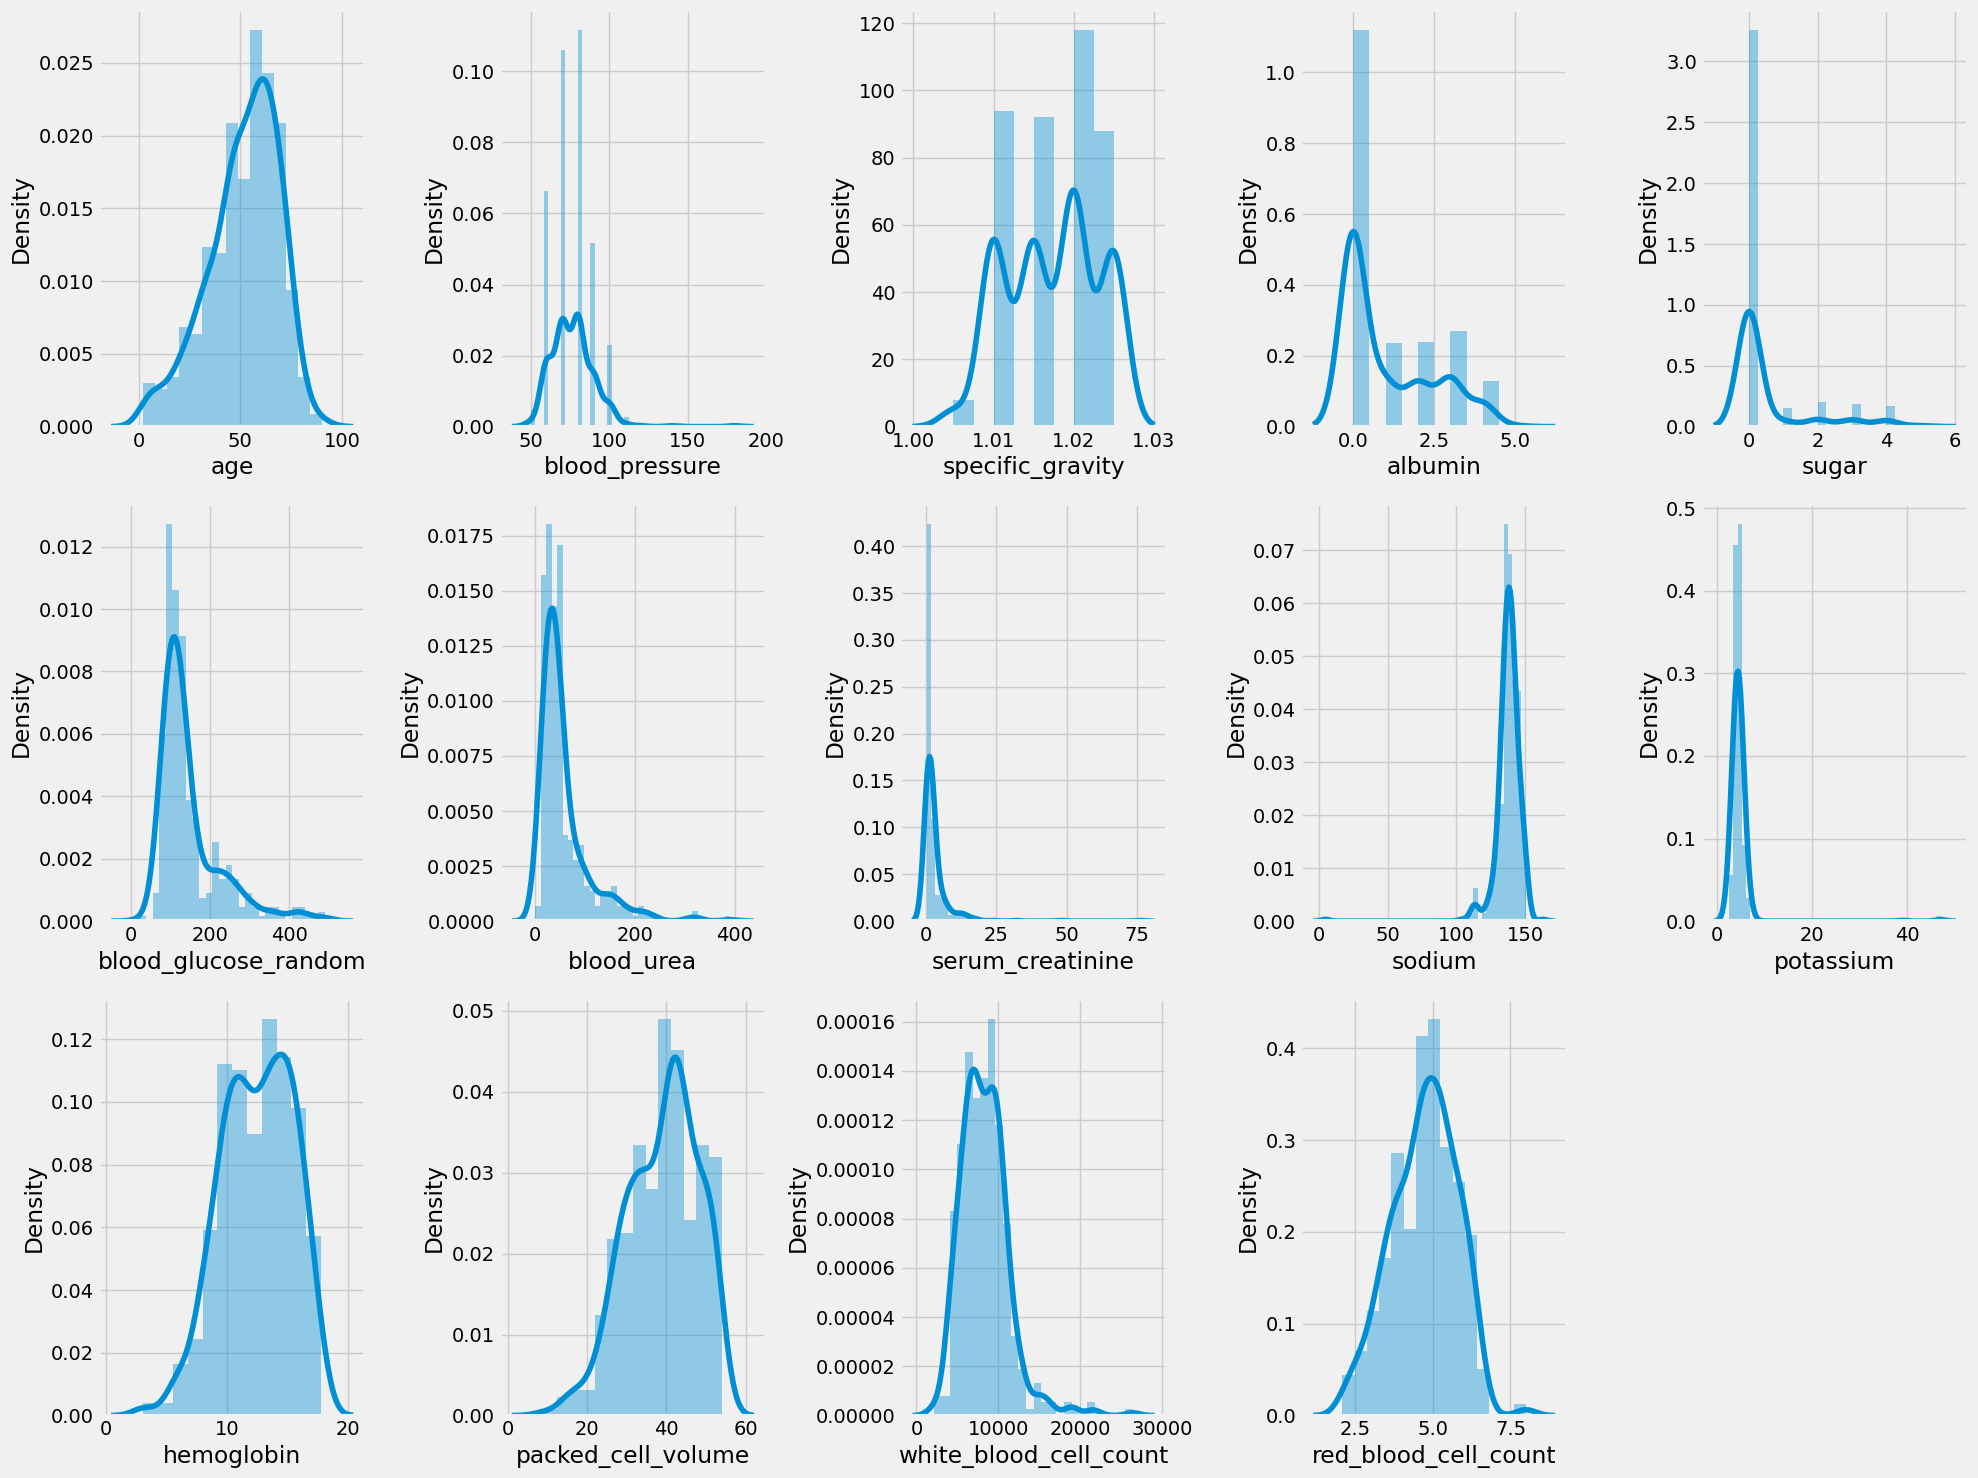

In [263]:
#Visualize numerical features to figure out patterns
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

- A lot of features like 'specific_gravity' and 'albumin' displays a level of imbalance. 
- Now we have to visualize the categorical columns to do the same thing.

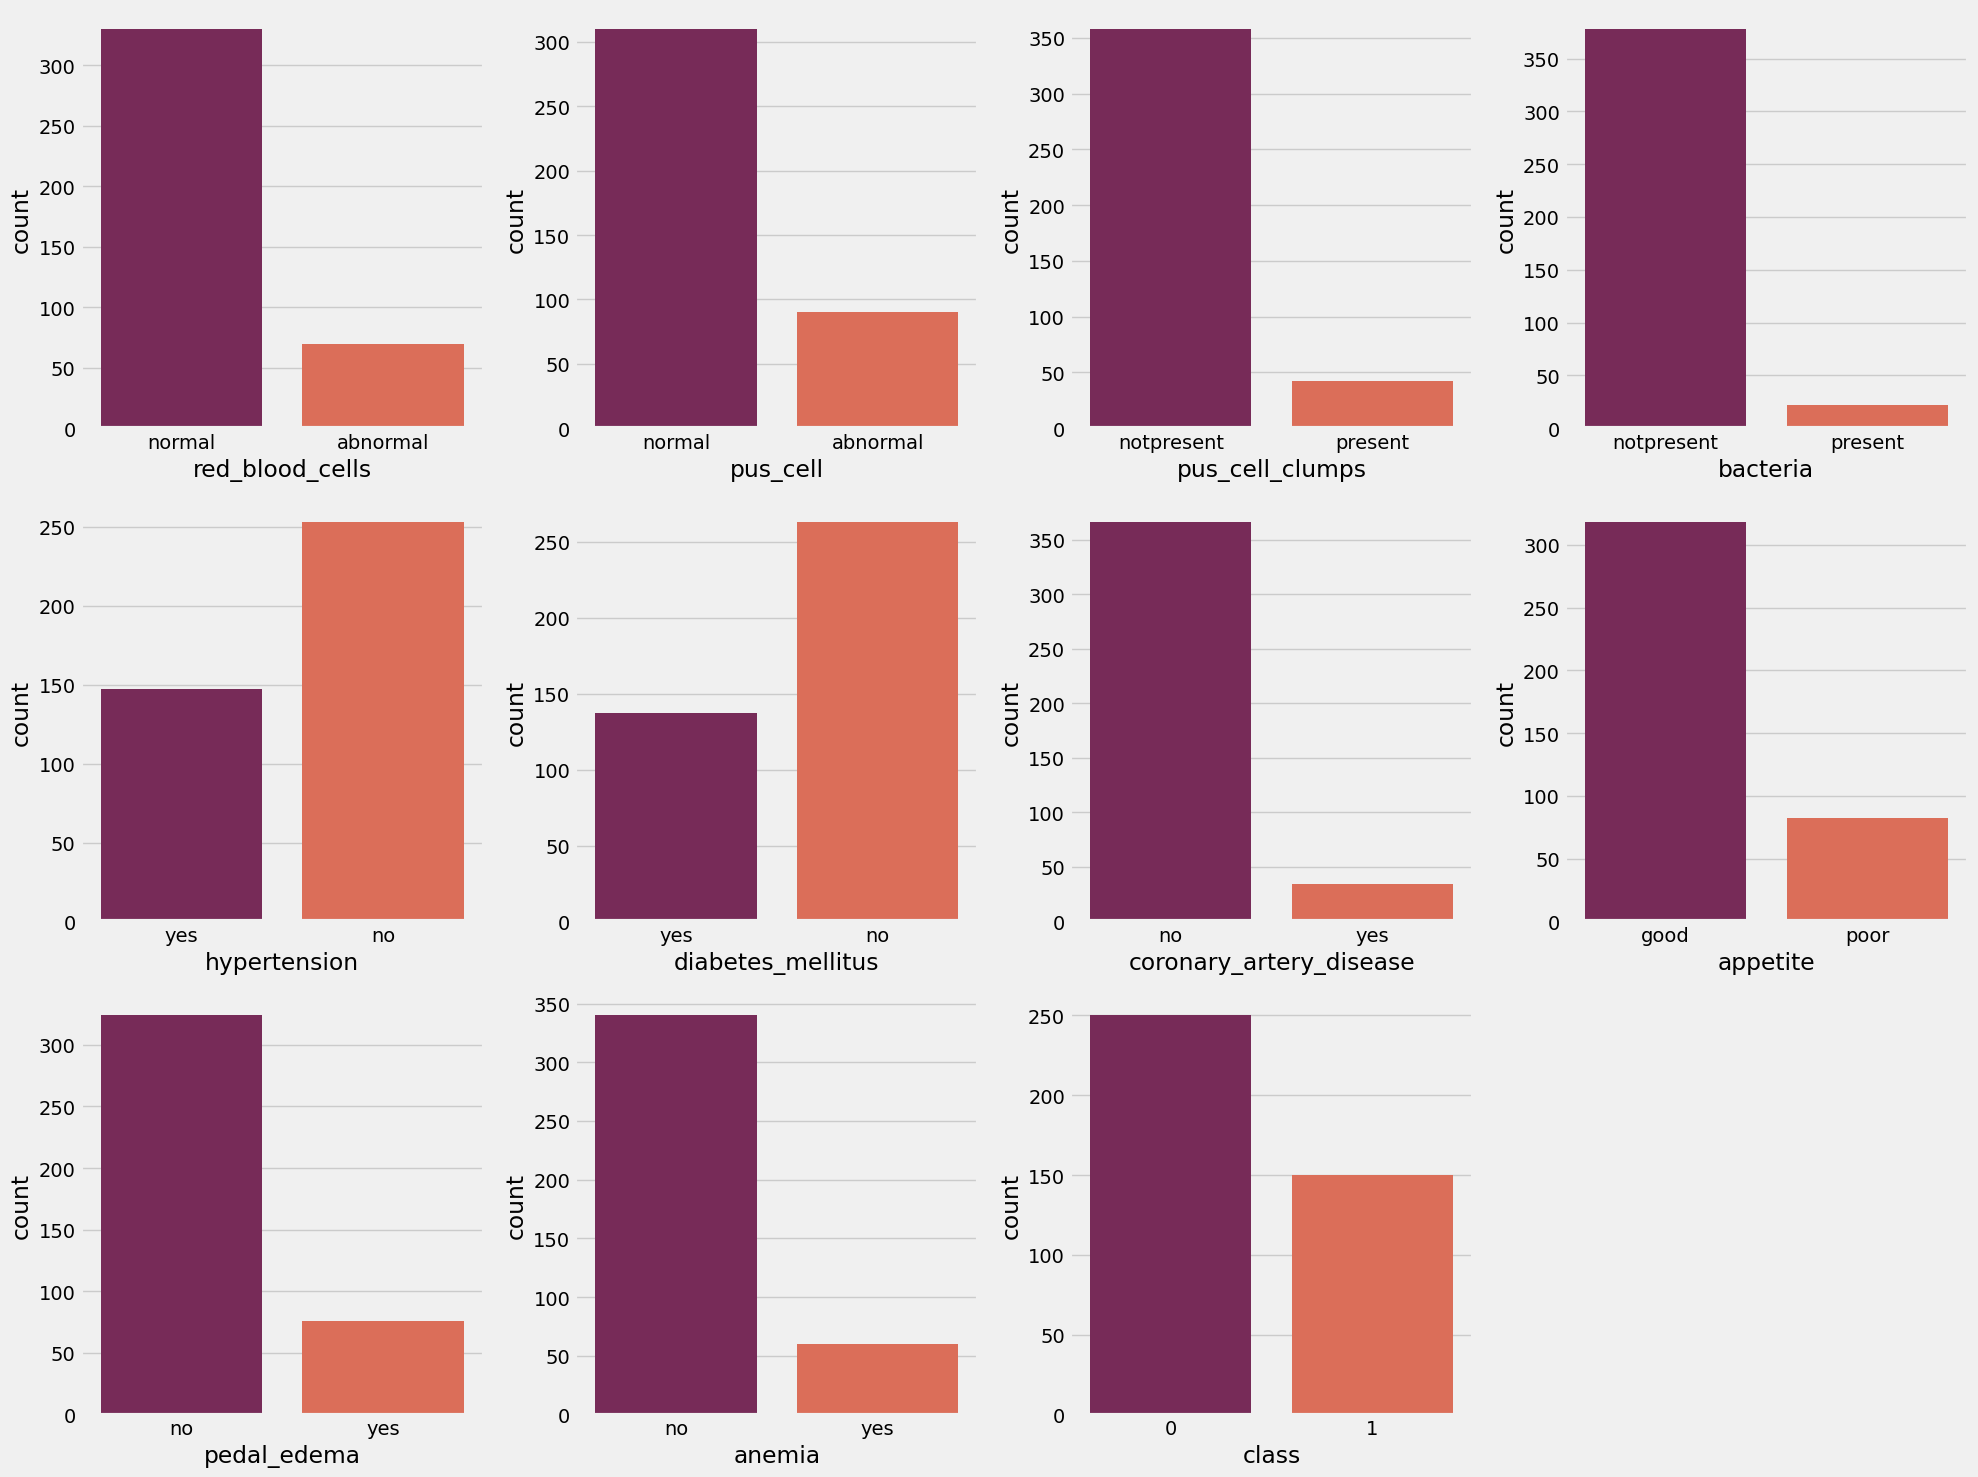

In [264]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[cat_cols], palette = 'rocket', x = column, legend=True)
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [265]:
df['class'] = pd.to_numeric(df['class'], errors='coerce')

- Convert the data type of 'class' from object to numeric for better manipulation.

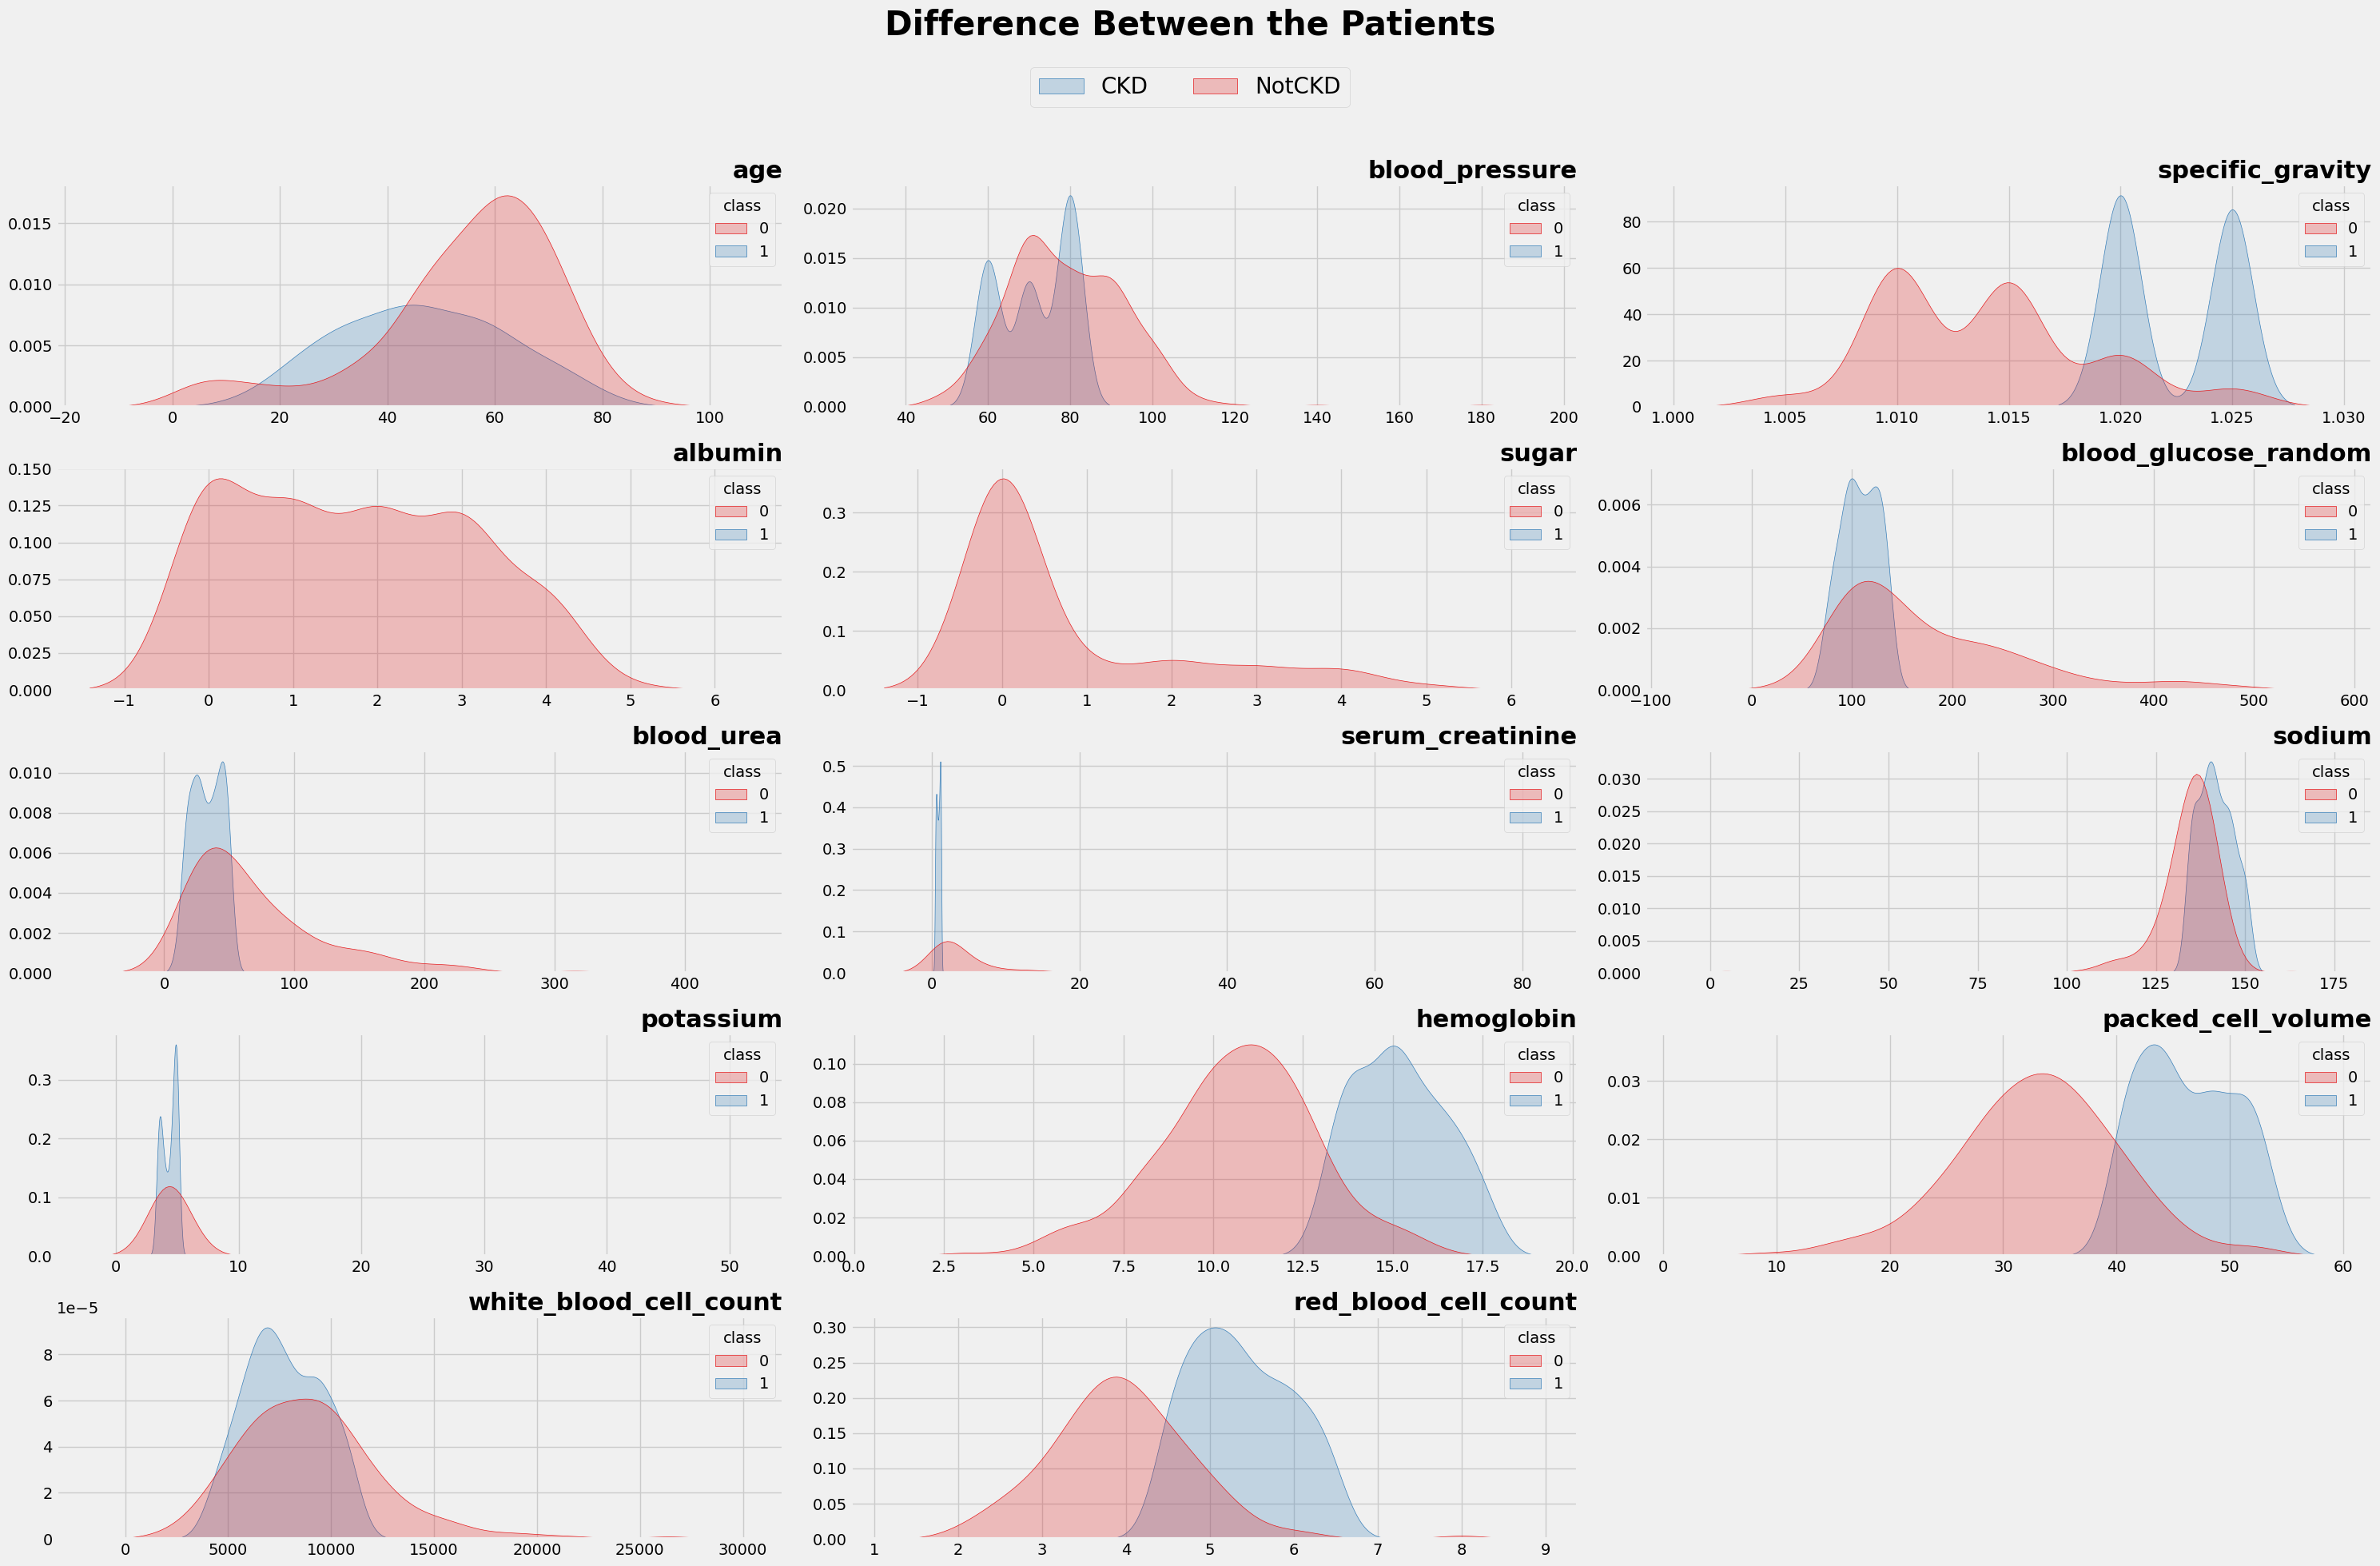

In [266]:
num_att_df = num_df.drop('class', axis=1)

figsize = (30, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(num_att_df[:]):
    ax = plt.subplot(5,3, idx+1)
    sns.kdeplot(data=num_df, hue='class', fill=True, x=col, palette='Set1', legend=True)
    
    ax.set_title(f'{col}', loc='right',weight='bold', fontsize=22)
    ax.set_ylabel('') 
    ax.set_xlabel('')

fig.suptitle('Difference Between the Patients\n\n\n', ha='center',  fontweight='bold', fontsize=30)
fig.legend(['CKD','NotCKD'], loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize=20, ncol=2)
plt.tight_layout()
plt.show()

- The figure shows the enormous difference of test levels between a patient with CKD and without CKD. Surprisingly, it also shows that non-CKD patient have higher sodium levels than those battling the disease. This might be because the latter patients are on a strictly monitored diet and sodium intake.

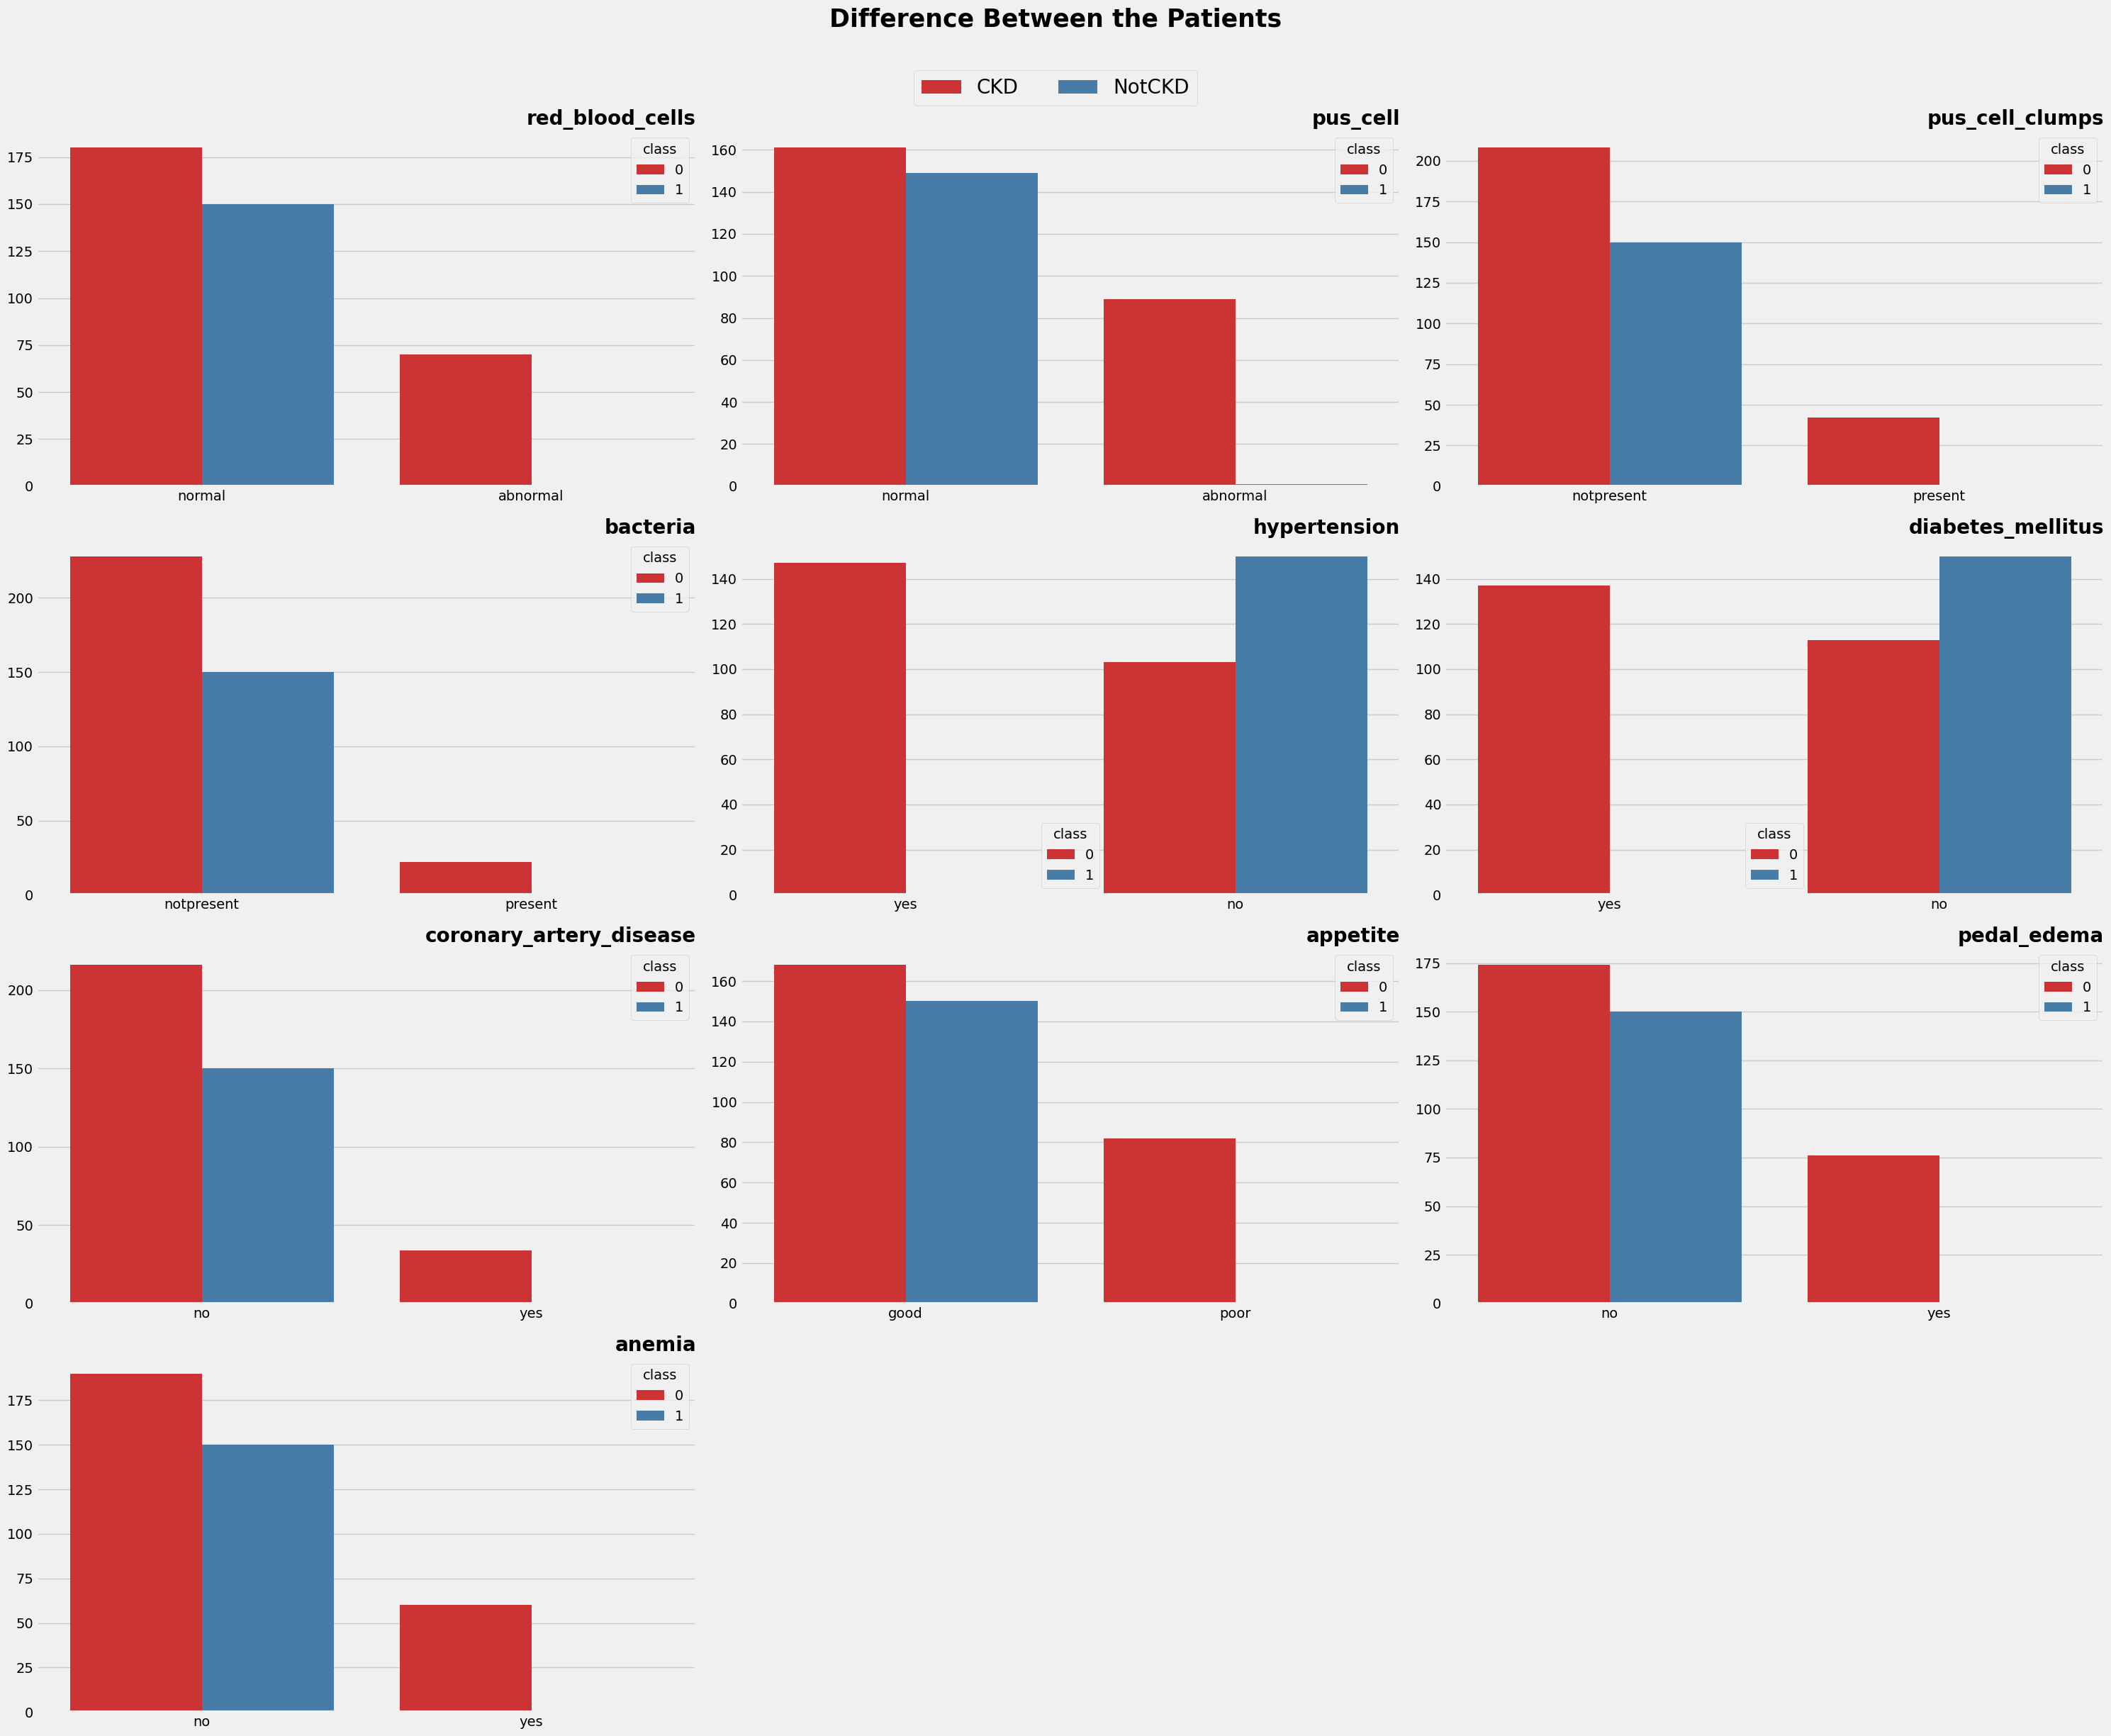

In [267]:
figsize = (30, 25)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(cat_df[:]):
    ax = plt.subplot(4,3, idx+1)
    sns.countplot(data=df[cat_cols], hue='class', fill=True, x=col, palette='Set1', legend=True)
            
    ax.set_title(f'{col}', loc='right', weight='bold', fontsize=20)
    ax.set_ylabel('')
    ax.set_xlabel('')

fig.suptitle('Difference Between the Patients\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(['CKD','NotCKD'], loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize=20, ncol=2)
plt.tight_layout()
plt.show()

- The categorical data are incredibly one sided. 7 out of 10 variables are only present on those with CKD. 

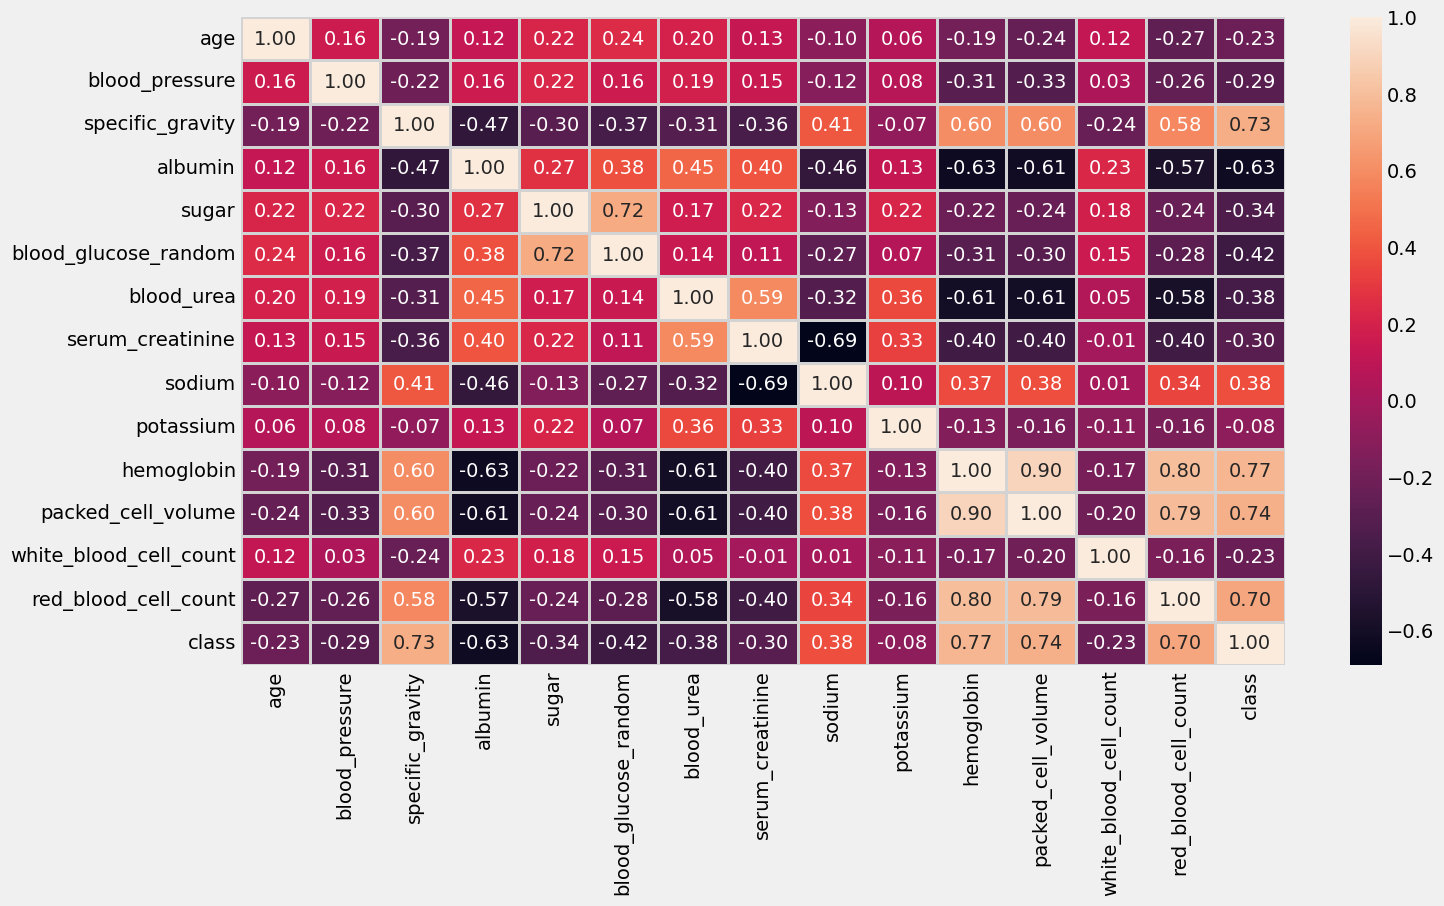

In [268]:
plt.figure(figsize = (15, 8))

correlation = num_df.corr()
sns.heatmap(correlation, annot = True, linewidths = 1, linecolor = 'lightgrey', fmt='.2f')
plt.show()

- As we can observe, strong correlation between some variables are seen. Exploratory Data Analysis will help us understand it further.

In [269]:
#Function for scatterplot, it makes calling it easier.   
def scatter(col1, col2):
    '''fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark',  color_discrete_sequence=['red'])
    return fig.show()'''
    plt.figure(figsize=(10,7))
    sns.scatterplot(x=col1, y=col2, data=df, hue='class', palette=['red','pink'])
    plt.show()


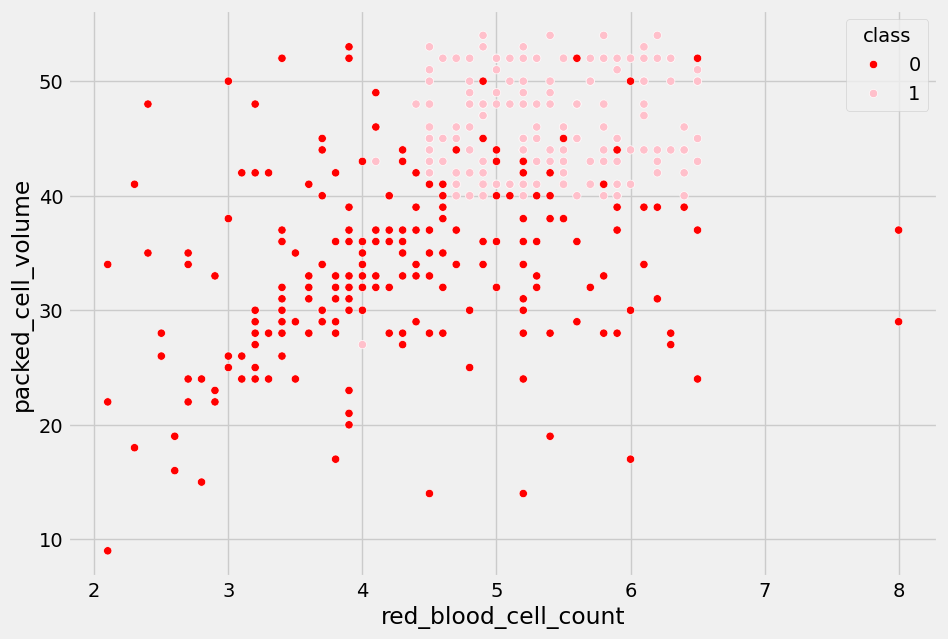

In [270]:
scatter('red_blood_cell_count', 'packed_cell_volume')

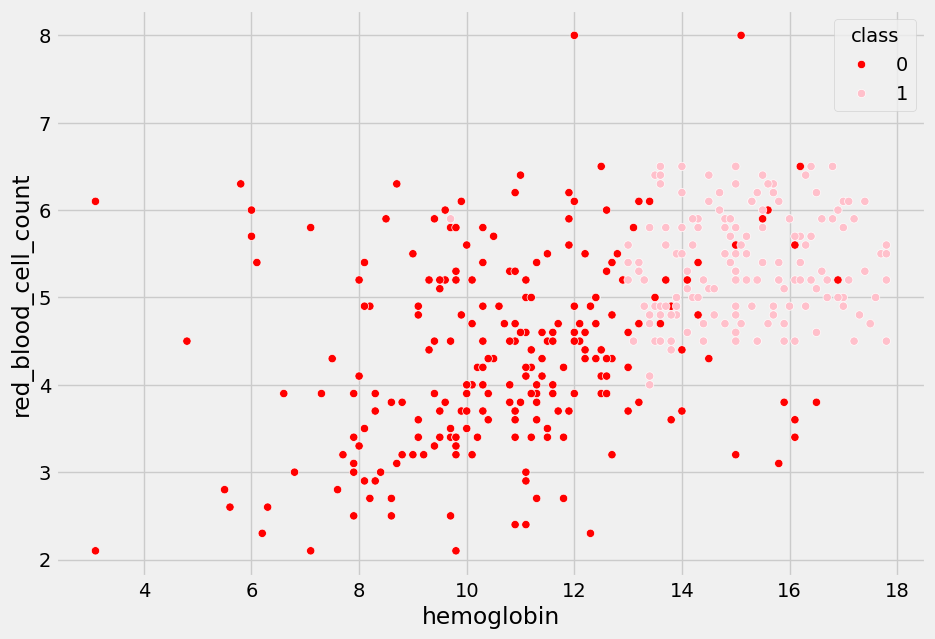

In [271]:
scatter('hemoglobin', 'red_blood_cell_count')

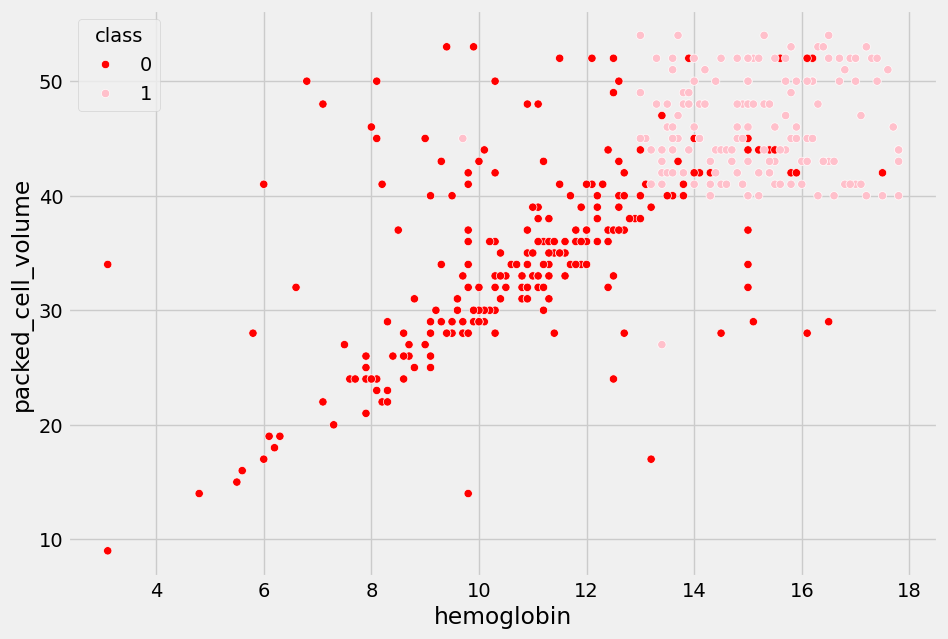

In [272]:
scatter('hemoglobin', 'packed_cell_volume')

- To further explore the results of the heatmap created, scatterplot is used on pairs which has significantly higher value than others.
### Correlation Findings:
- People with high hemoglobin level and packed_cell_volume has a lower chance of having CKD.
- More CKD patients have 10-14g/dl hemoglobin level and 3-5million/mm3 red blood count.
- Lower red blood cell count and packed cell volume is prone to having CKD.

In [273]:
#Now that we've understood the data, feature encoding is needed to make model building easier.

for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

pedal_edema has 2 categories

anemia has 2 categories

class has 2 categories



In [274]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,133.0,4.7,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,108.0,18.0,0.8,140.0,3.4,11.3,38.0,6000.0,5.4,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,147.0,4.0,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,139.0,47.0,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


- Transform the categorical labels into zeroes (0) and ones (1)

## Step 5: Model Selection, Implementation, and Evaluation

In [276]:
# splitting data intp training and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state = 0)

def model_testing(model):
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)

    conf_m = confusion_matrix(y_test, prediction)
    sns.heatmap(conf_m, annot=True, fmt='d', cmap=['darkred','pink'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    print()
    print("\t\t--- Classification Report ---")
    print(classification_report(y_test, prediction))


#### Decision Tree Classifier

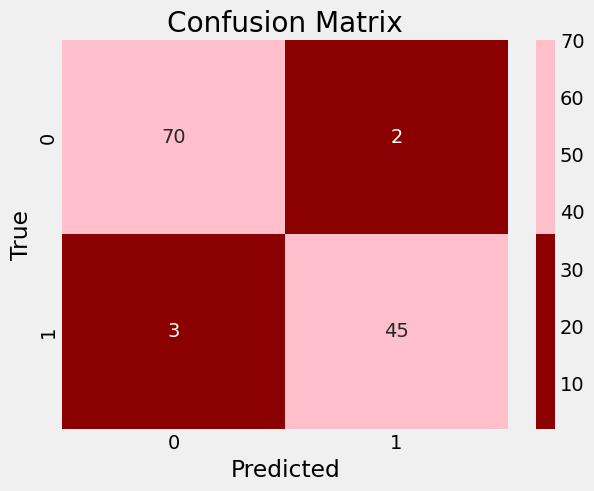


		--- Classification Report ---
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.96      0.94      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



In [ ]:
DecisionTree = DecisionTreeClassifier()
model_testing(DecisionTree)

#### Random Forest Classifer

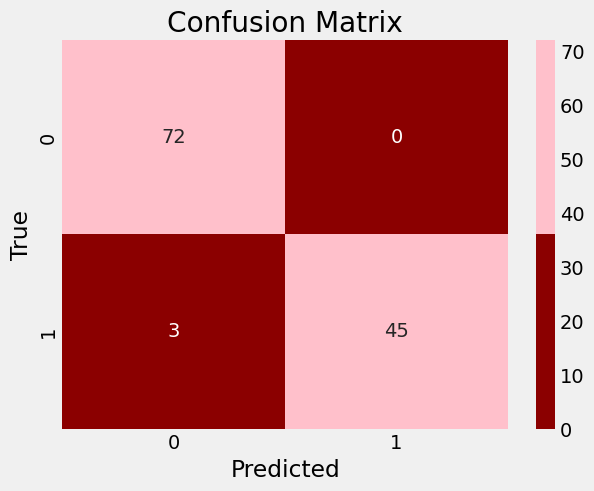


		--- Classification Report ---
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [ ]:
RandomForest = RandomForestClassifier()
model_testing(RandomForest)

#### Logistic Regression

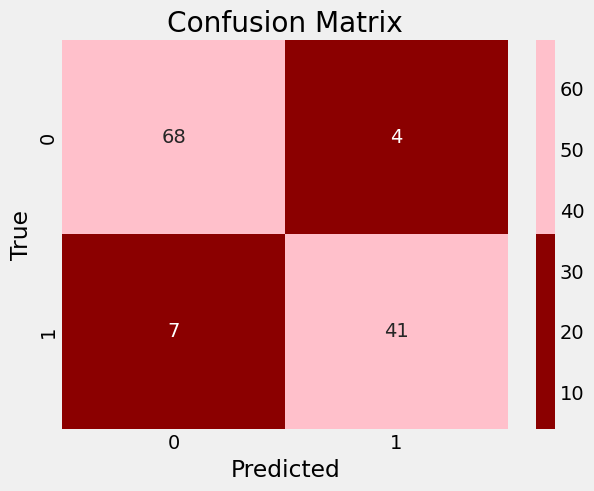


		--- Classification Report ---
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        72
           1       0.91      0.85      0.88        48

    accuracy                           0.91       120
   macro avg       0.91      0.90      0.90       120
weighted avg       0.91      0.91      0.91       120



In [ ]:
LogisticRegression = LogisticRegression()
model_testing(LogisticRegression)

### Model Comparison


- The following are the results of the model evaluation:

    | Model | Precision | Recall | Accuracy |
    | --- | --- | --- | --- |
    | Decision Tree | 96% | 96% | 96% |
    | Random Forest | 98% | 97% | 97% | 
    | Logistic Regression | 91% | 90% | 91% |
- The model with the highest accuracy among the three is the **Random Forest Classifier**


### Conclusion:

This project was made in order to predict whether a person has Chronic Kidney Disease or not using three machine learning algorithms, namely, decision tree, random forest, and logistic regression. The models achieved an accuracy of 96%, 97%, and 91% respectively.